**Importing Libraries**

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings

In [80]:
warnings.filterwarnings('ignore')

**Loading the Data**

In [81]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

**Analysing the Data and Data Preprocessing**

In [82]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
train_data = train_data.drop(["Name", "Ticket", "Cabin"], axis = 1)

In [85]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
test_data.drop(["Name", "Ticket", "Cabin"], axis = 1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


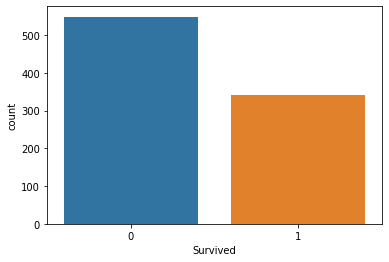

In [87]:
sns.countplot(x=train_data['Survived'], data=pd.melt(train_data))

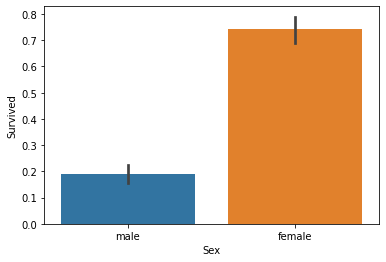

In [88]:
sns.barplot(x="Sex", y="Survived", data=train_data)

In [89]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())

**Spliting the Data**

In [90]:
columns = ['Pclass', 'Sex', 'Age']

X = train_data[columns]
y = train_data['Survived']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

**Scaling the Data**

In [92]:
encoder = LabelEncoder()

encoder.fit(X_train['Sex'])
X_train['Sex'] = encoder.transform(X_train['Sex'])
X_test['Sex'] = encoder.transform(X_test['Sex'])

In [93]:
model = []

def fill_model():
  model.append("Random Forest", RandomForestClassifier)
  model.append("Decision Tree", DecisionTreeClassifier)
  model.append("Support Vector Machine (SVM)", SVC)
  
fill_model

<function __main__.fill_model>

**Creating Models**

In [94]:
rfc = RandomForestClassifier(n_estimators = 200, criterion = "entropy", max_depth = 6)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

#Accuracy 85%

In [95]:
#tree = DecisionTreeClassifier()

#tree.fit(X_train, y_train)

#y_pred = tree.predict(X_test)

#Accuracy 83%

In [96]:
#svc = SVC(kernel = "rbf")

#svc.fit(X_train, y_train)

#y_pred = svc.predict(X_test)

#Accuracy 66%

**Evaluating the Model**

Accuracy Score:  83.5820895522388


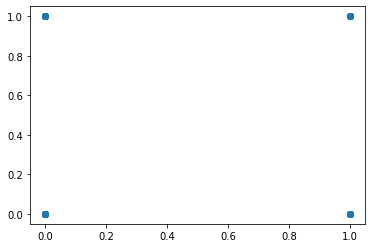

In [97]:
cm = confusion_matrix(y_test, y_pred)
cm
plt.scatter(y_test, y_pred)
print("Accuracy Score: ", accuracy_score(y_test, y_pred) * 100)

In [98]:
cm

array([[154,  24],
       [ 20,  70]])

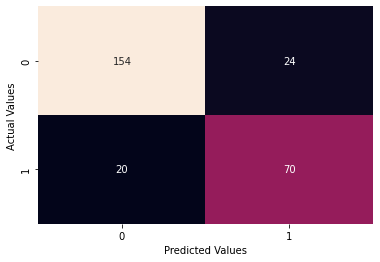

In [99]:
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [102]:
my_submission = pd.DataFrame({"PassengerId": "PassengerId", 'Survived': y_pred})

my_submission.to_csv("Submission.csv", index=False)